In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="0XuHi2VgGqme2HRZpjjp")
project = rf.workspace("handrecognizer").project("student-action-recognition")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Student-action-recognition-1 in yolov8:: 100%|██████████| 10868/10868 [00:01<00:00, 7950.94it/s] 


In [ ]:
!nvidia-smi

Fri Jan 17 16:00:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   57C    P8             10W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [ ]:
!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6096.0/8062.4 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/kaggle/working
100%|██████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 86.2MB/s]
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100%|████████████████████████████████████████| 104k/104k [00:00<00:00, 76.1MB/s]
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 51.9ms
Speed: 8.0ms preprocess, 51.9ms inference, 287.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/kaggle/working


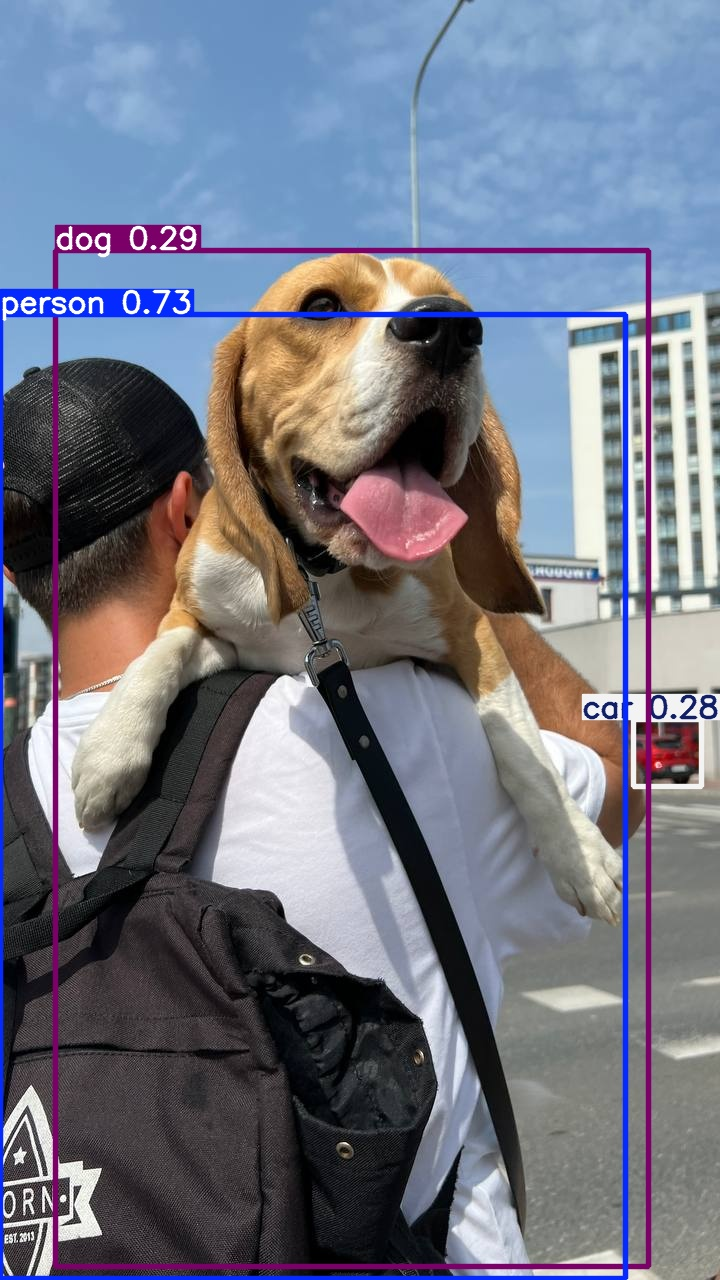

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /kaggle/working/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 48.8ms
Speed: 3.0ms preprocess, 48.8ms inference, 170.4ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/kaggle/working
New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Student-action-recognition-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina

/kaggle/working


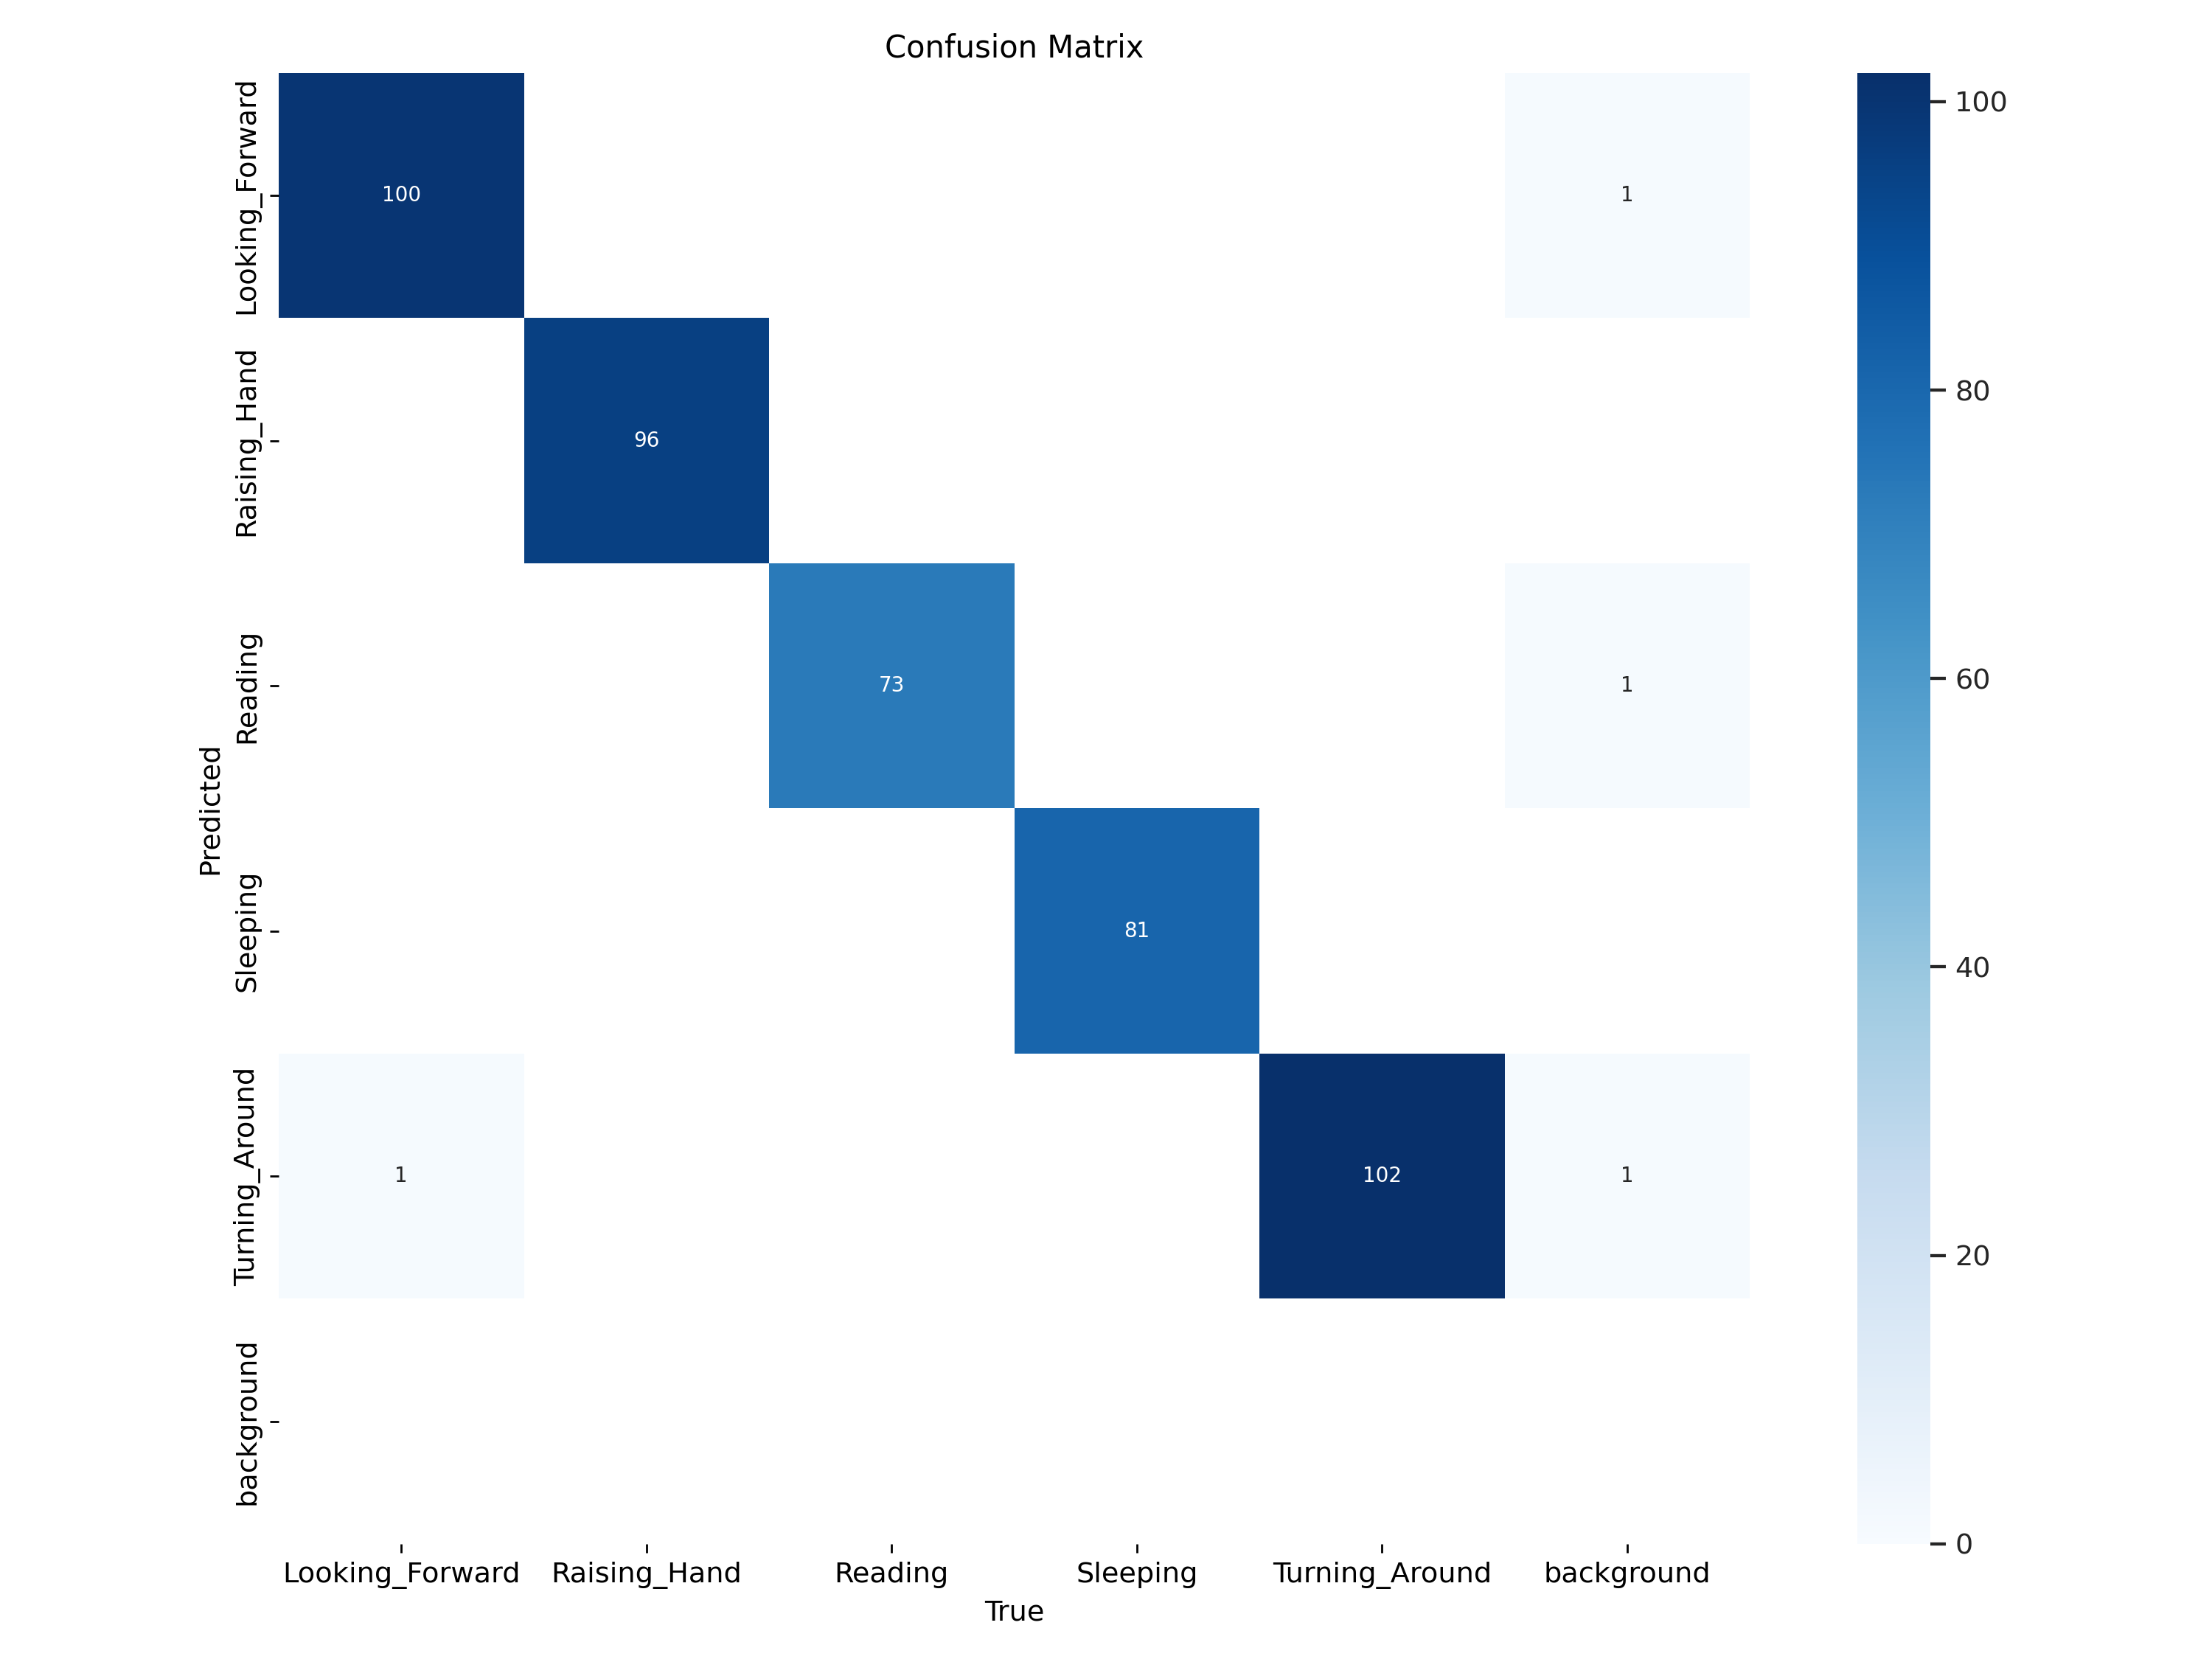

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


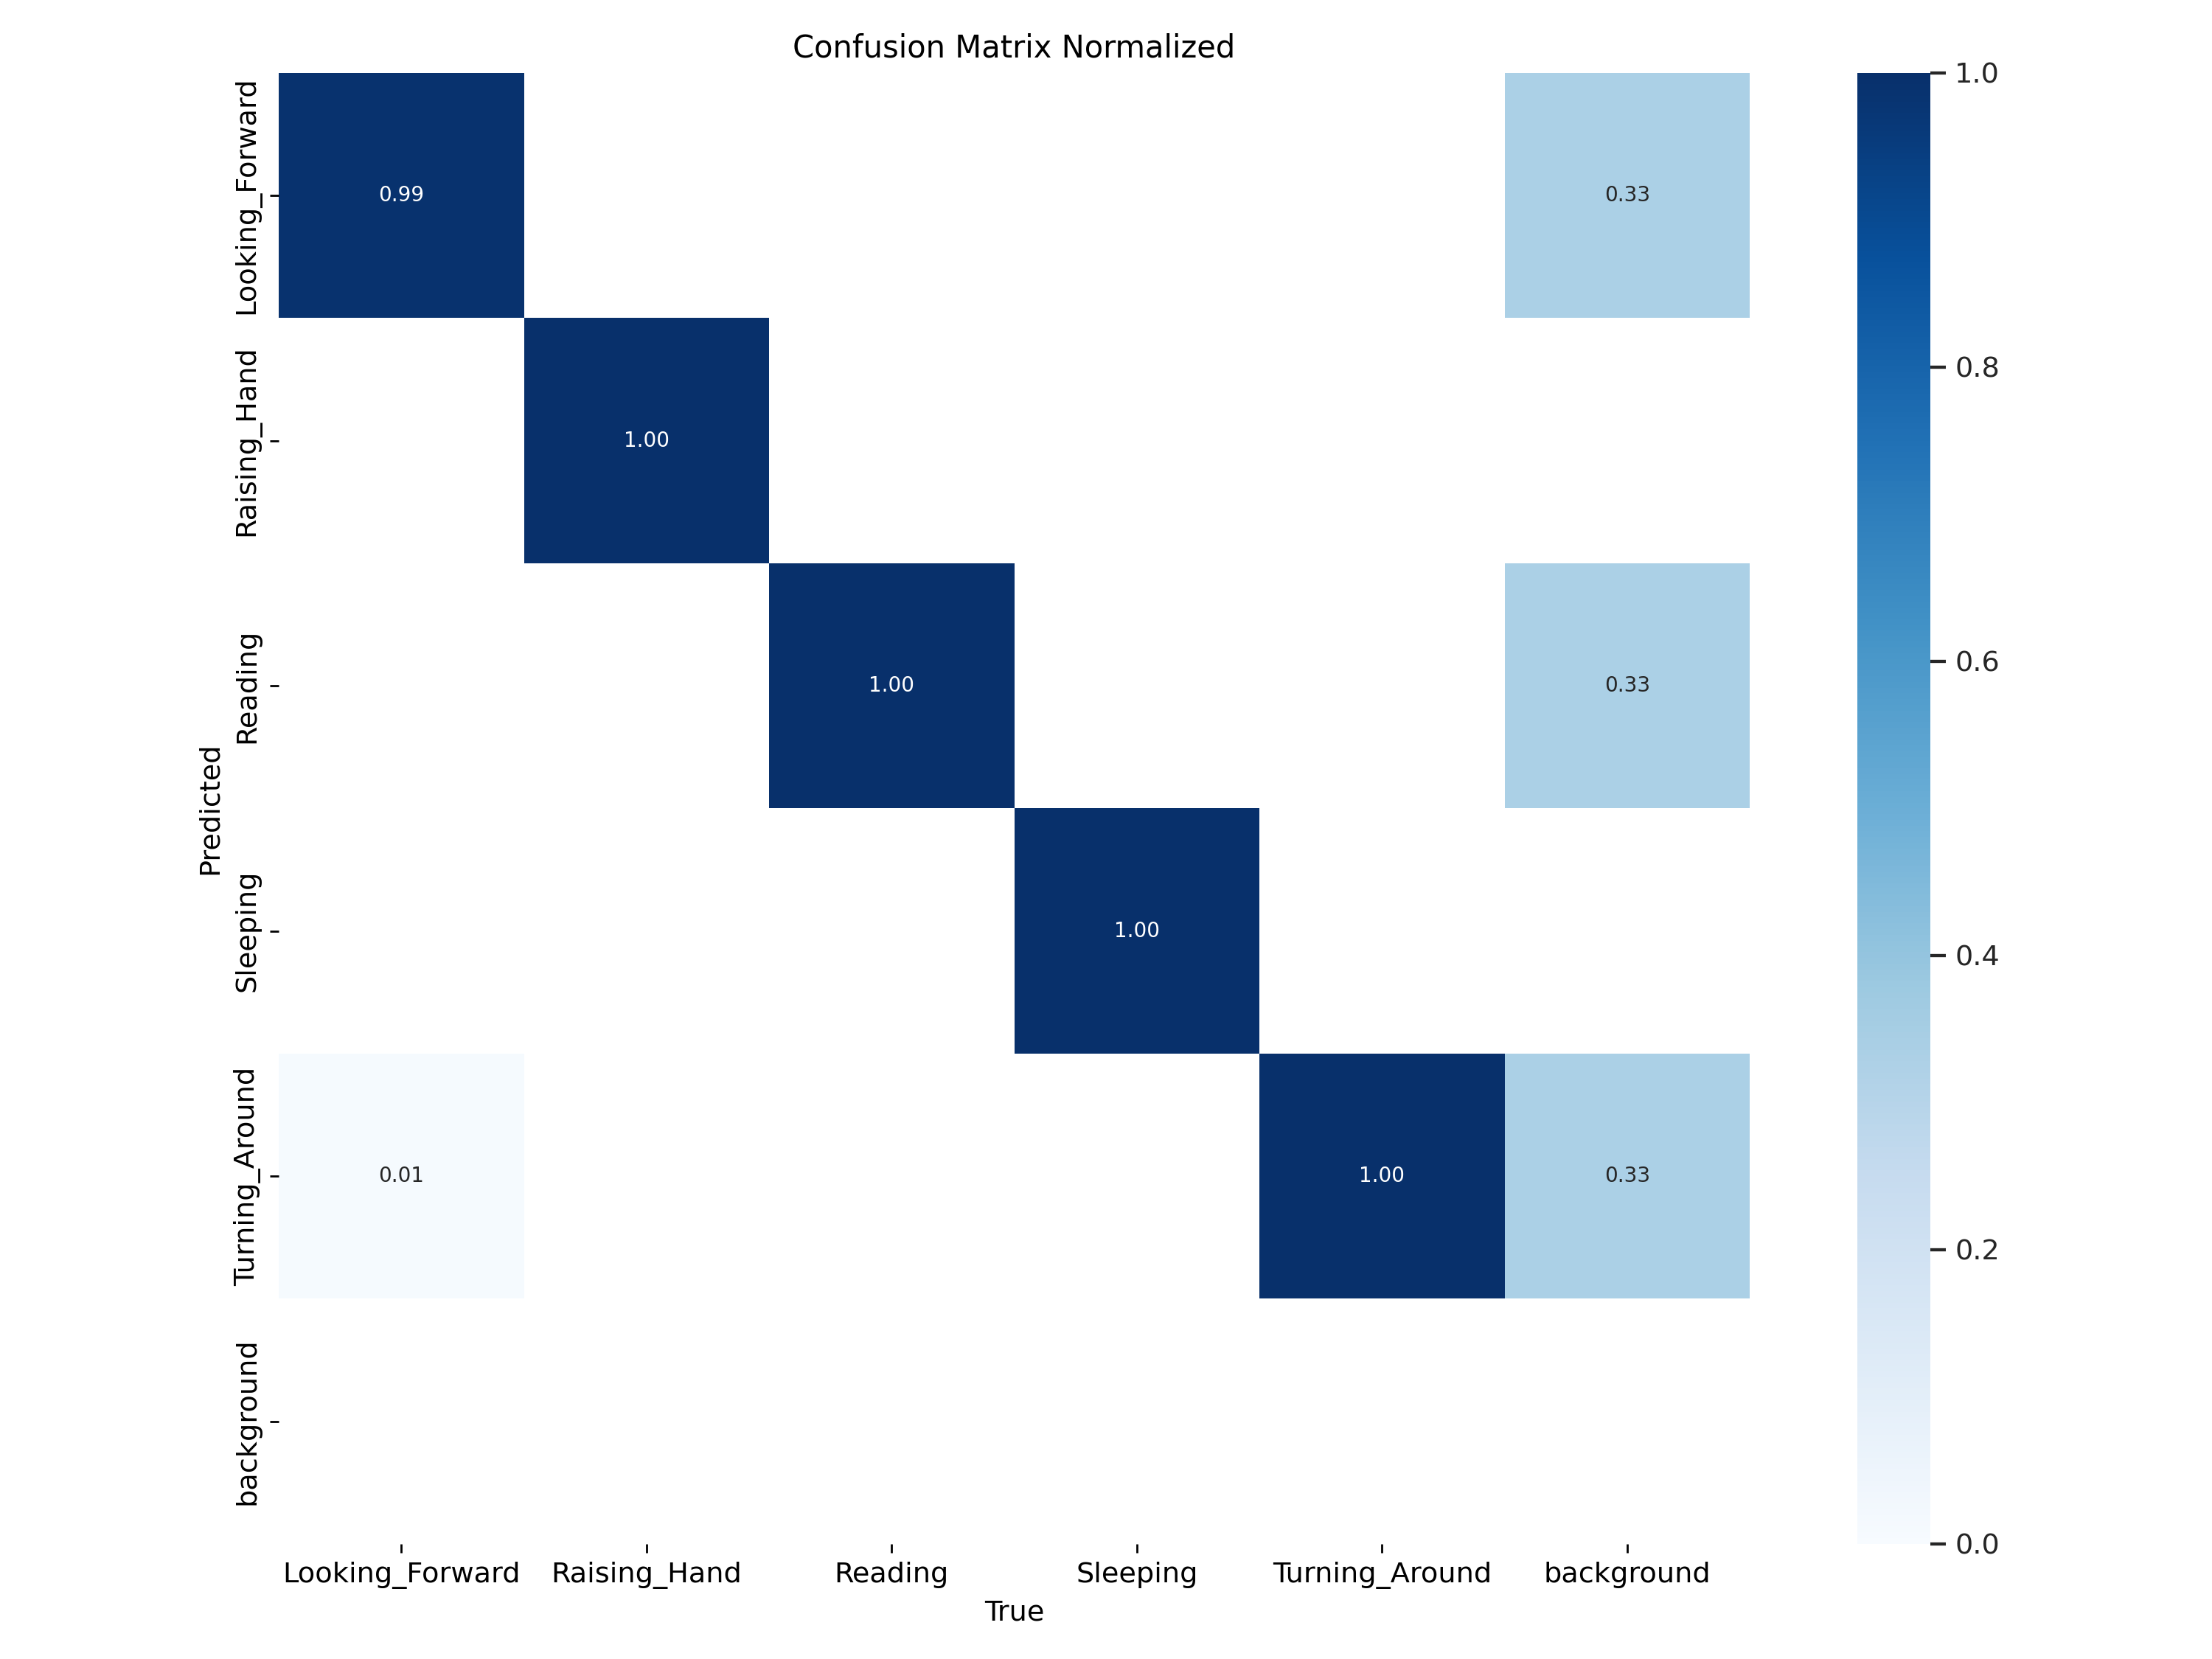

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

/kaggle/working


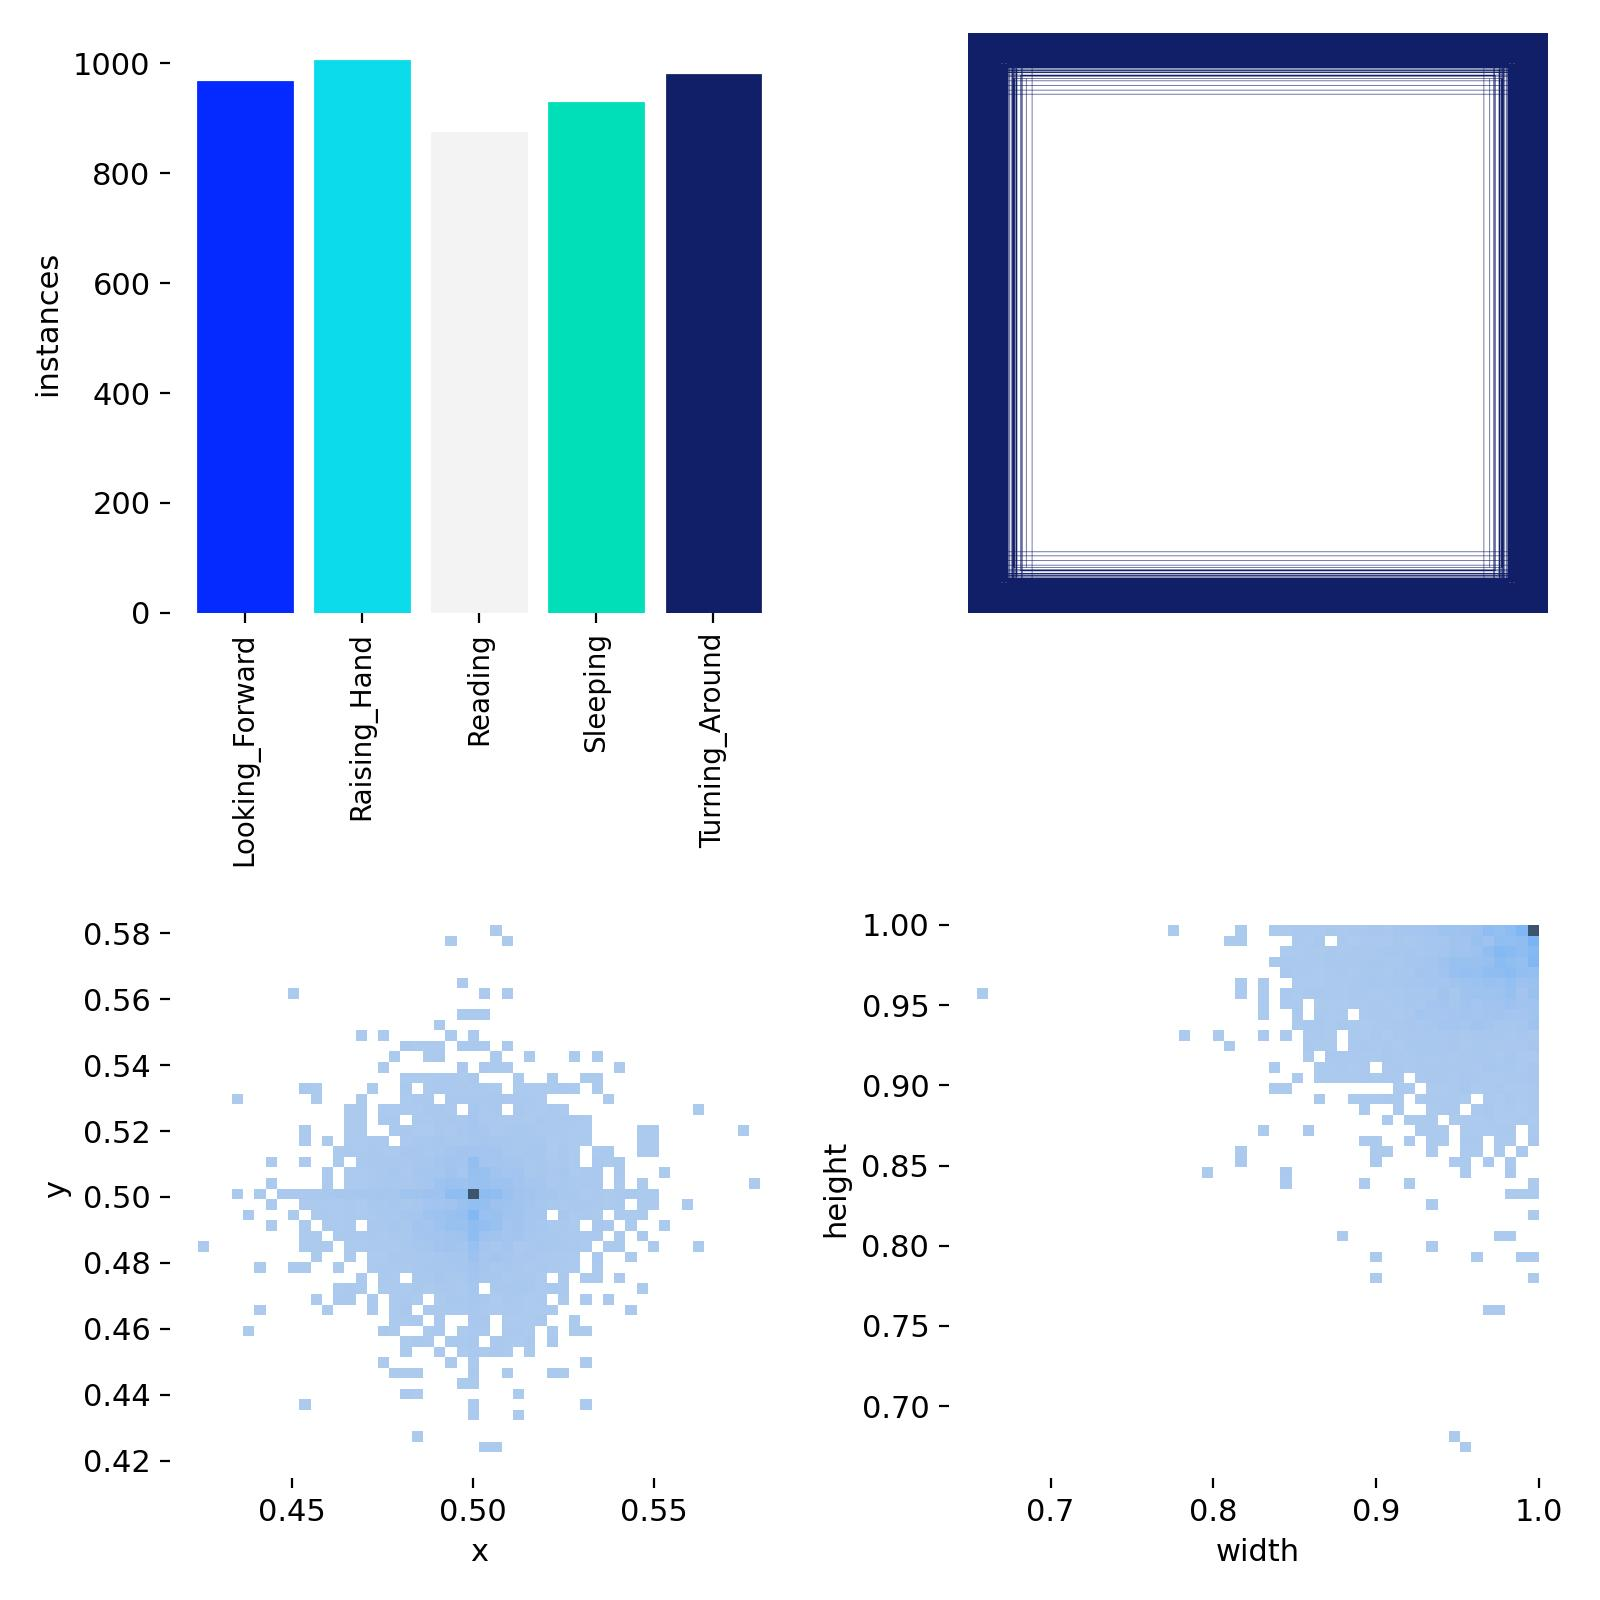

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels.jpg', width=600)

/kaggle/working


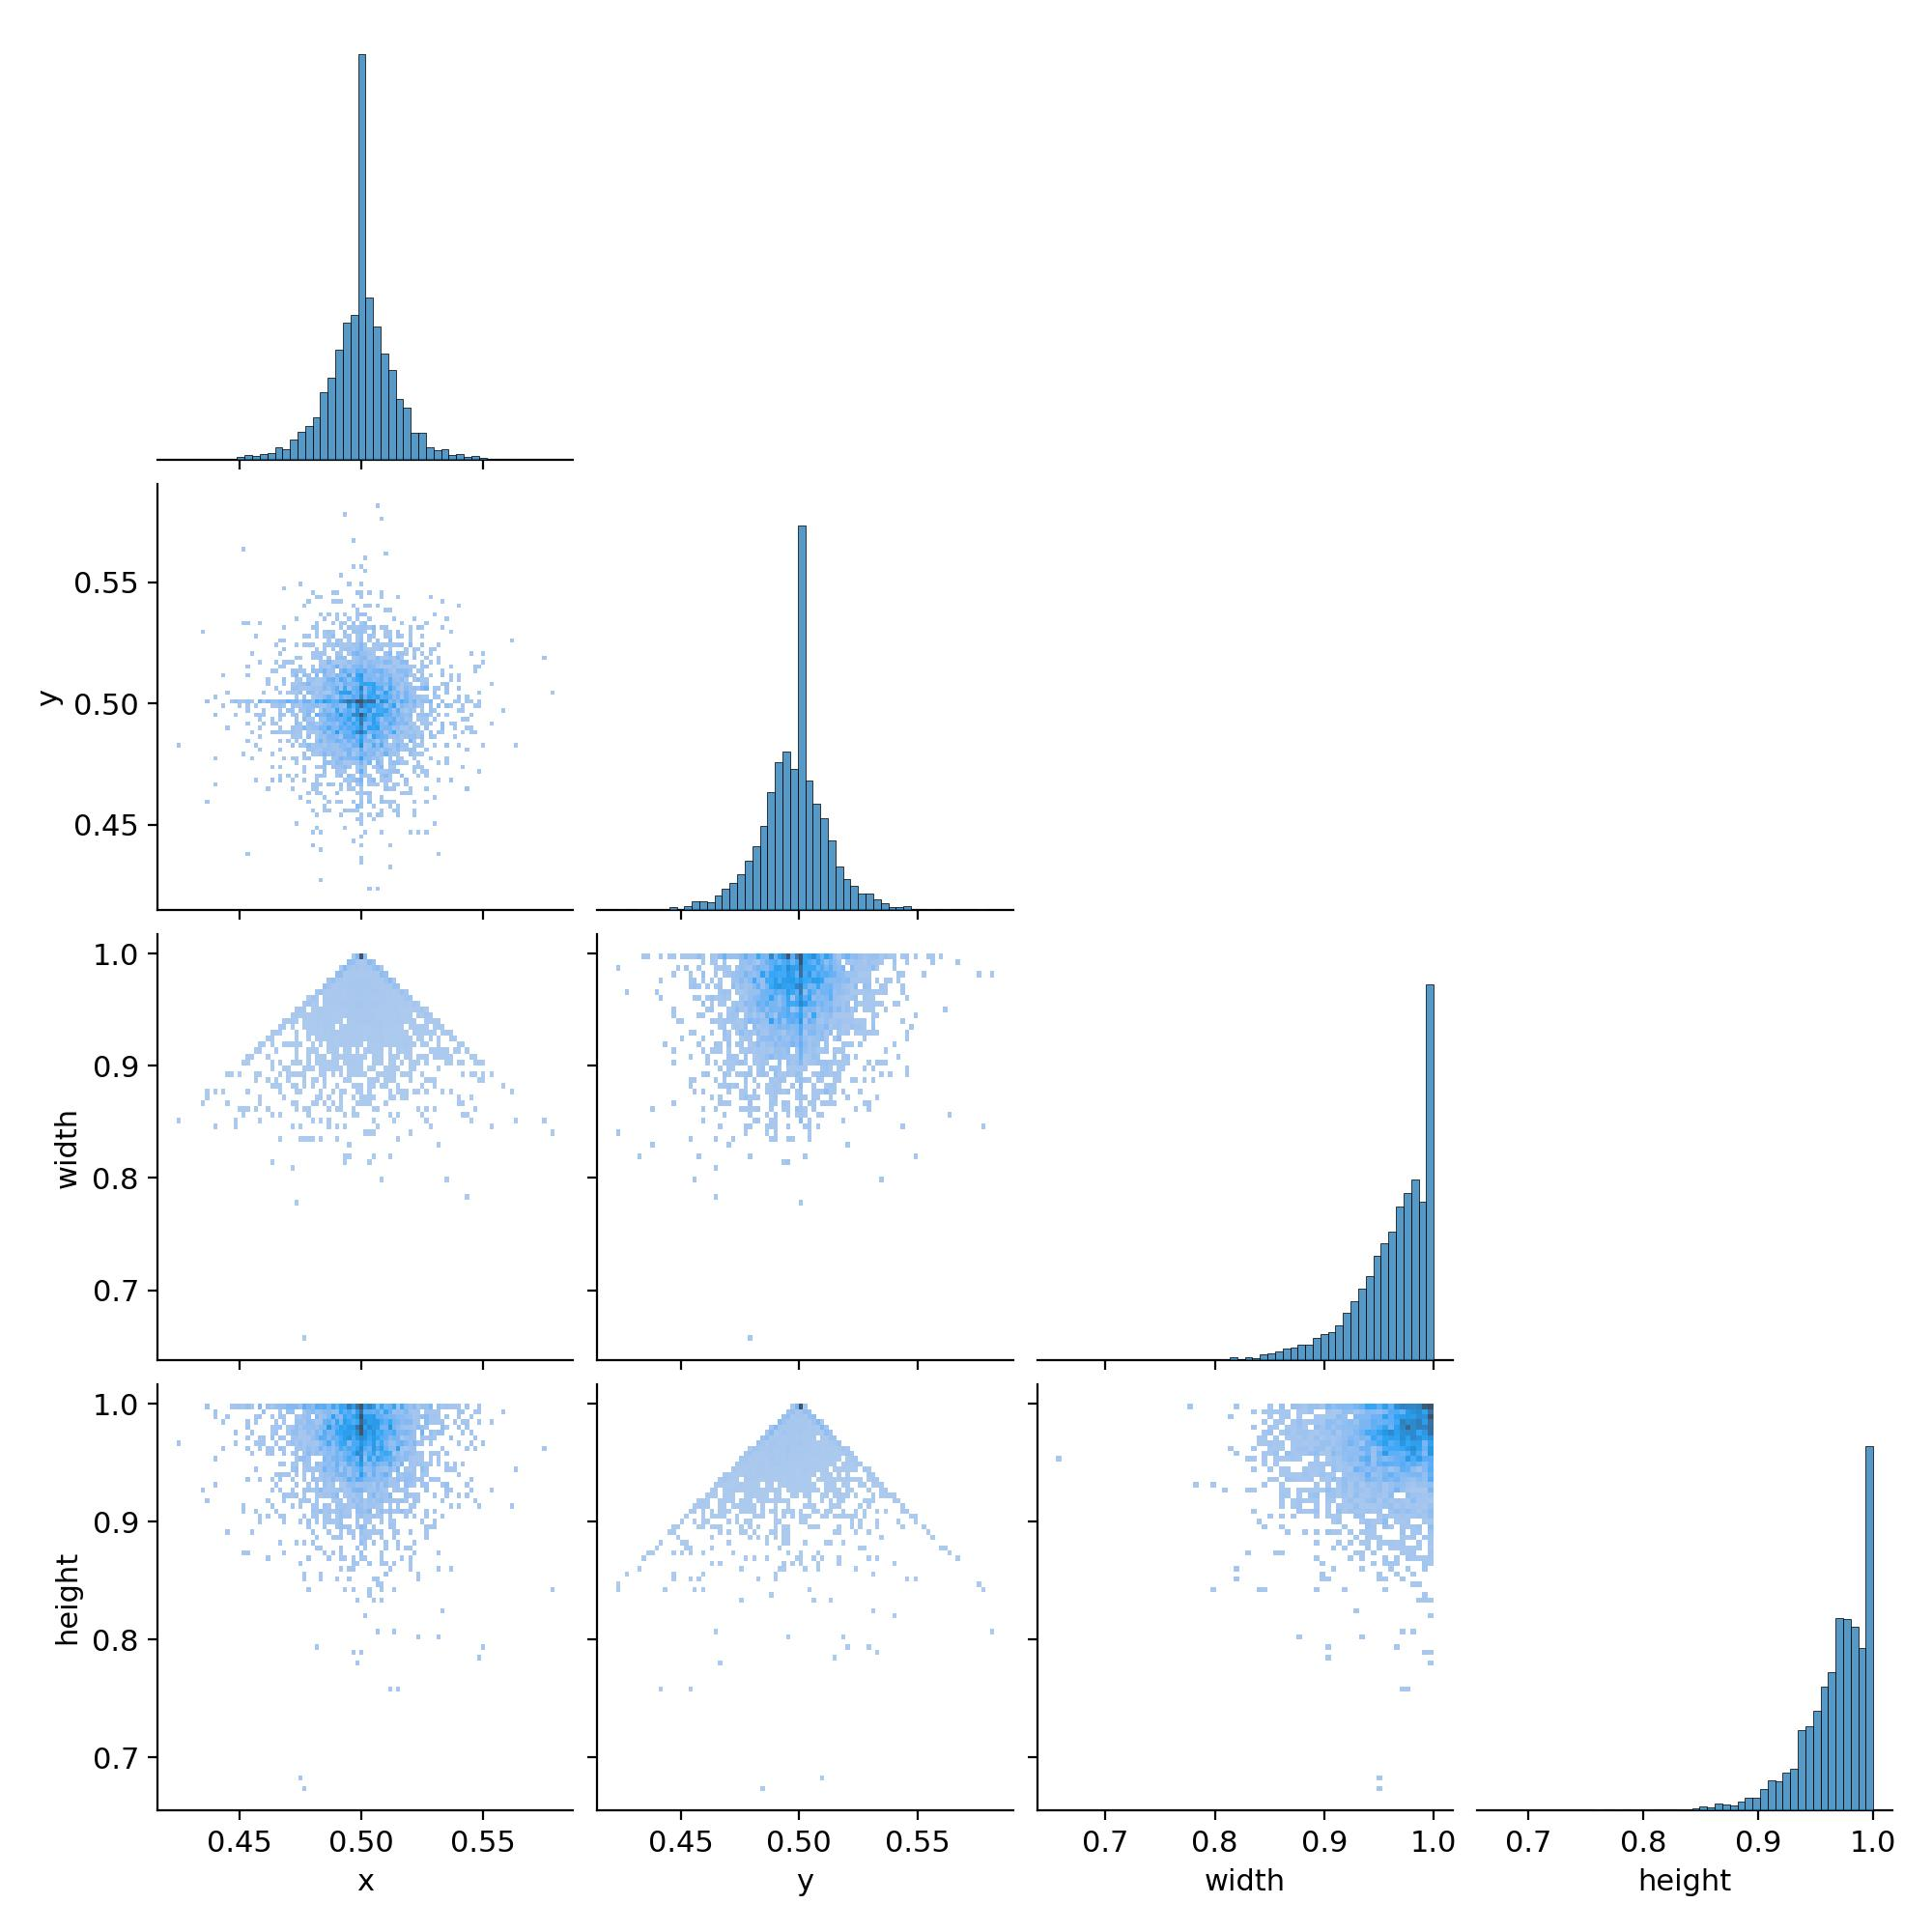

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/labels_correlogram.jpg', width=600)

/kaggle/working


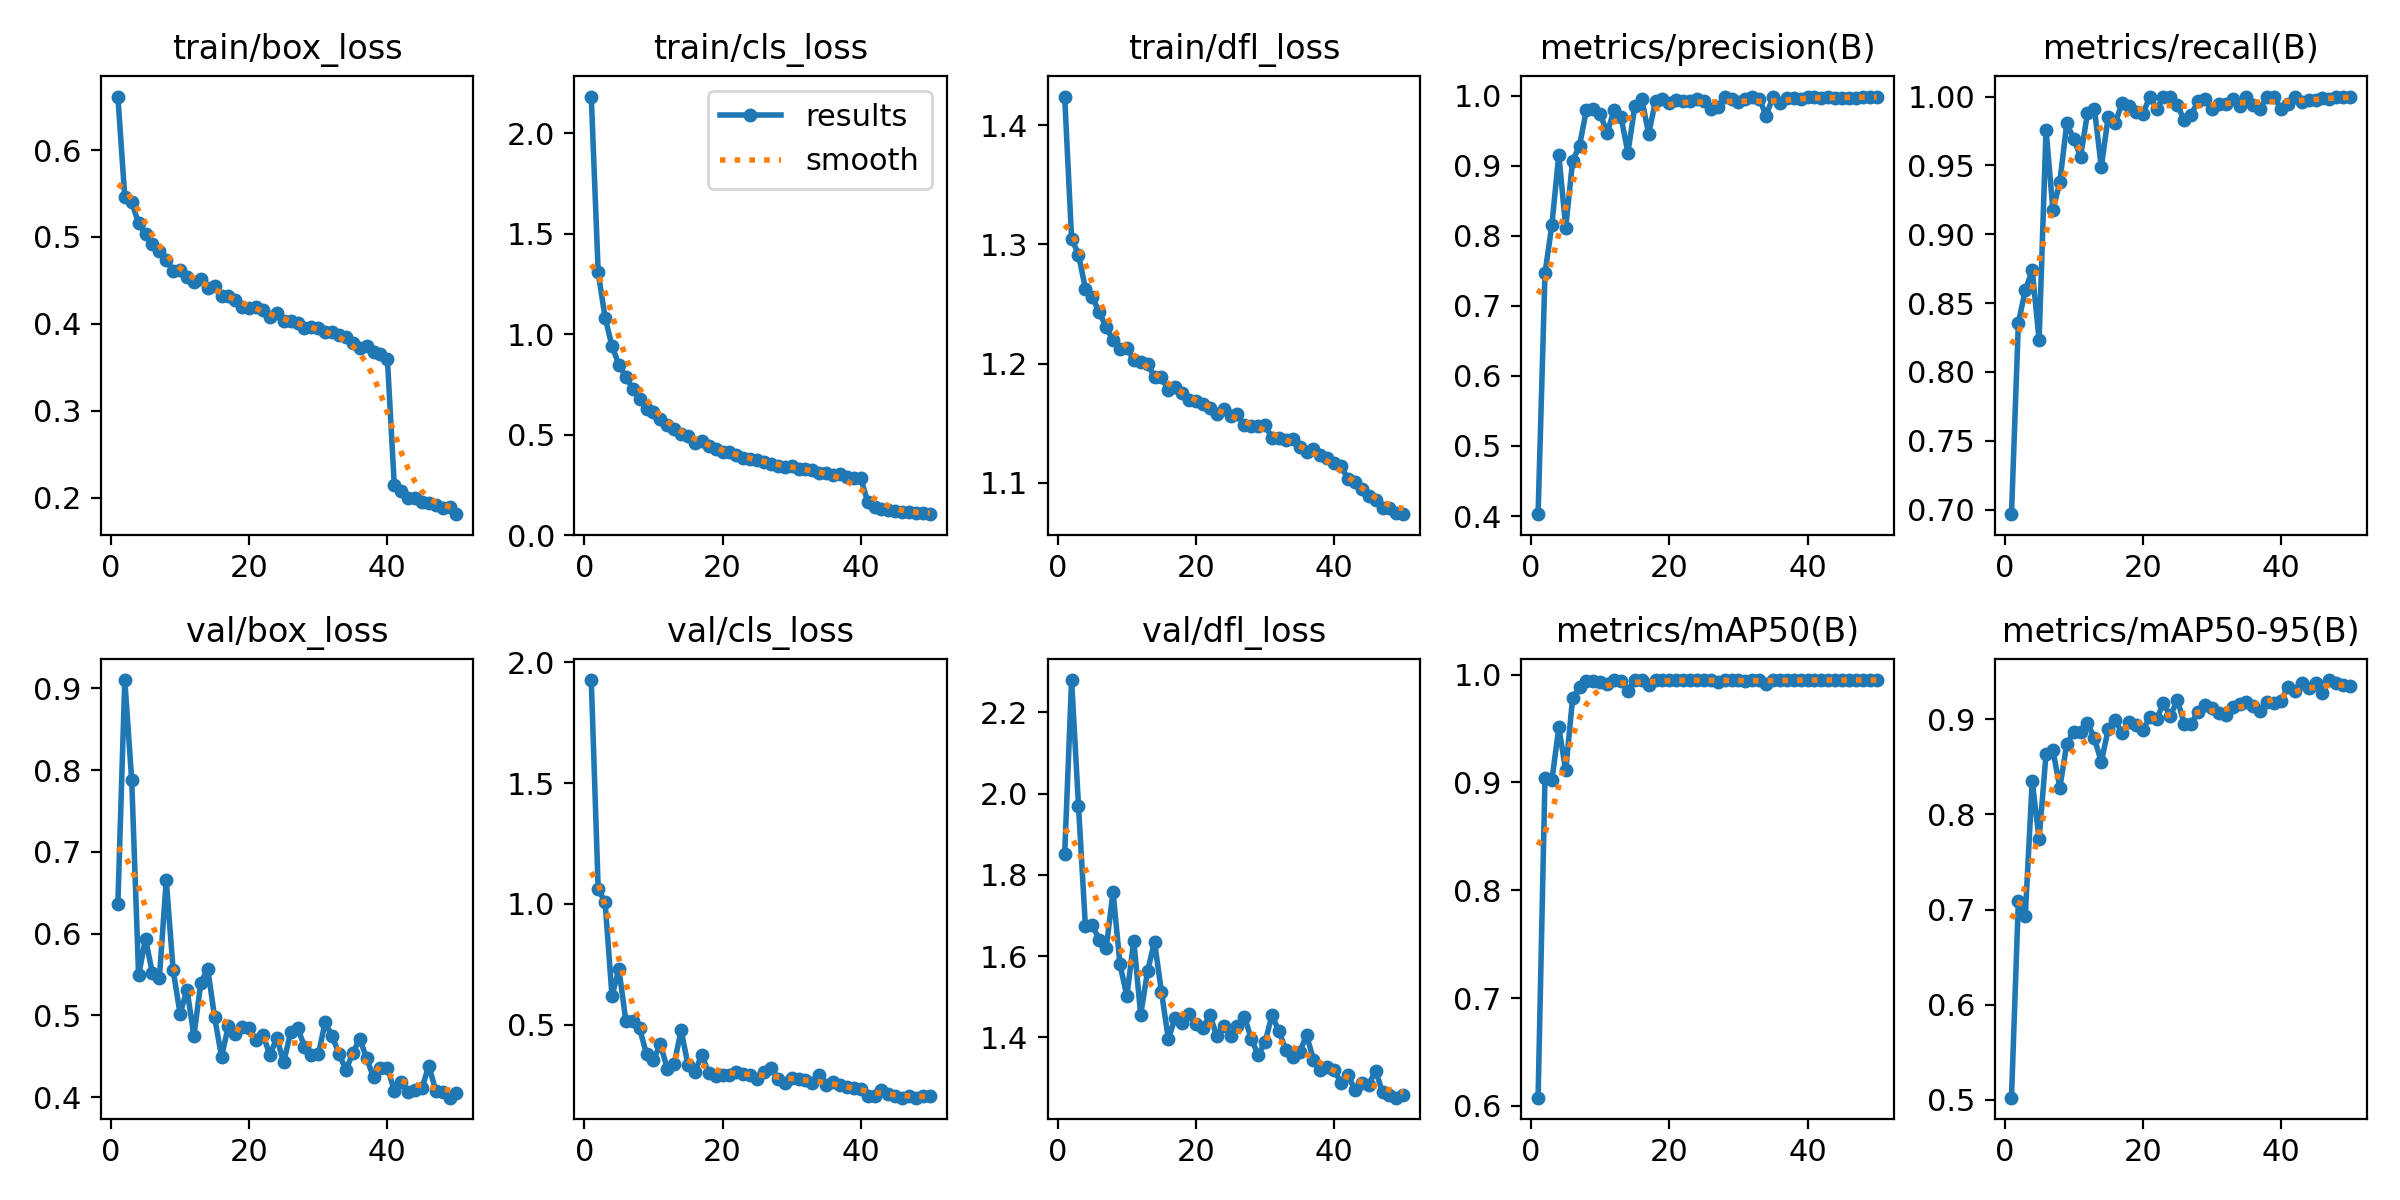

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


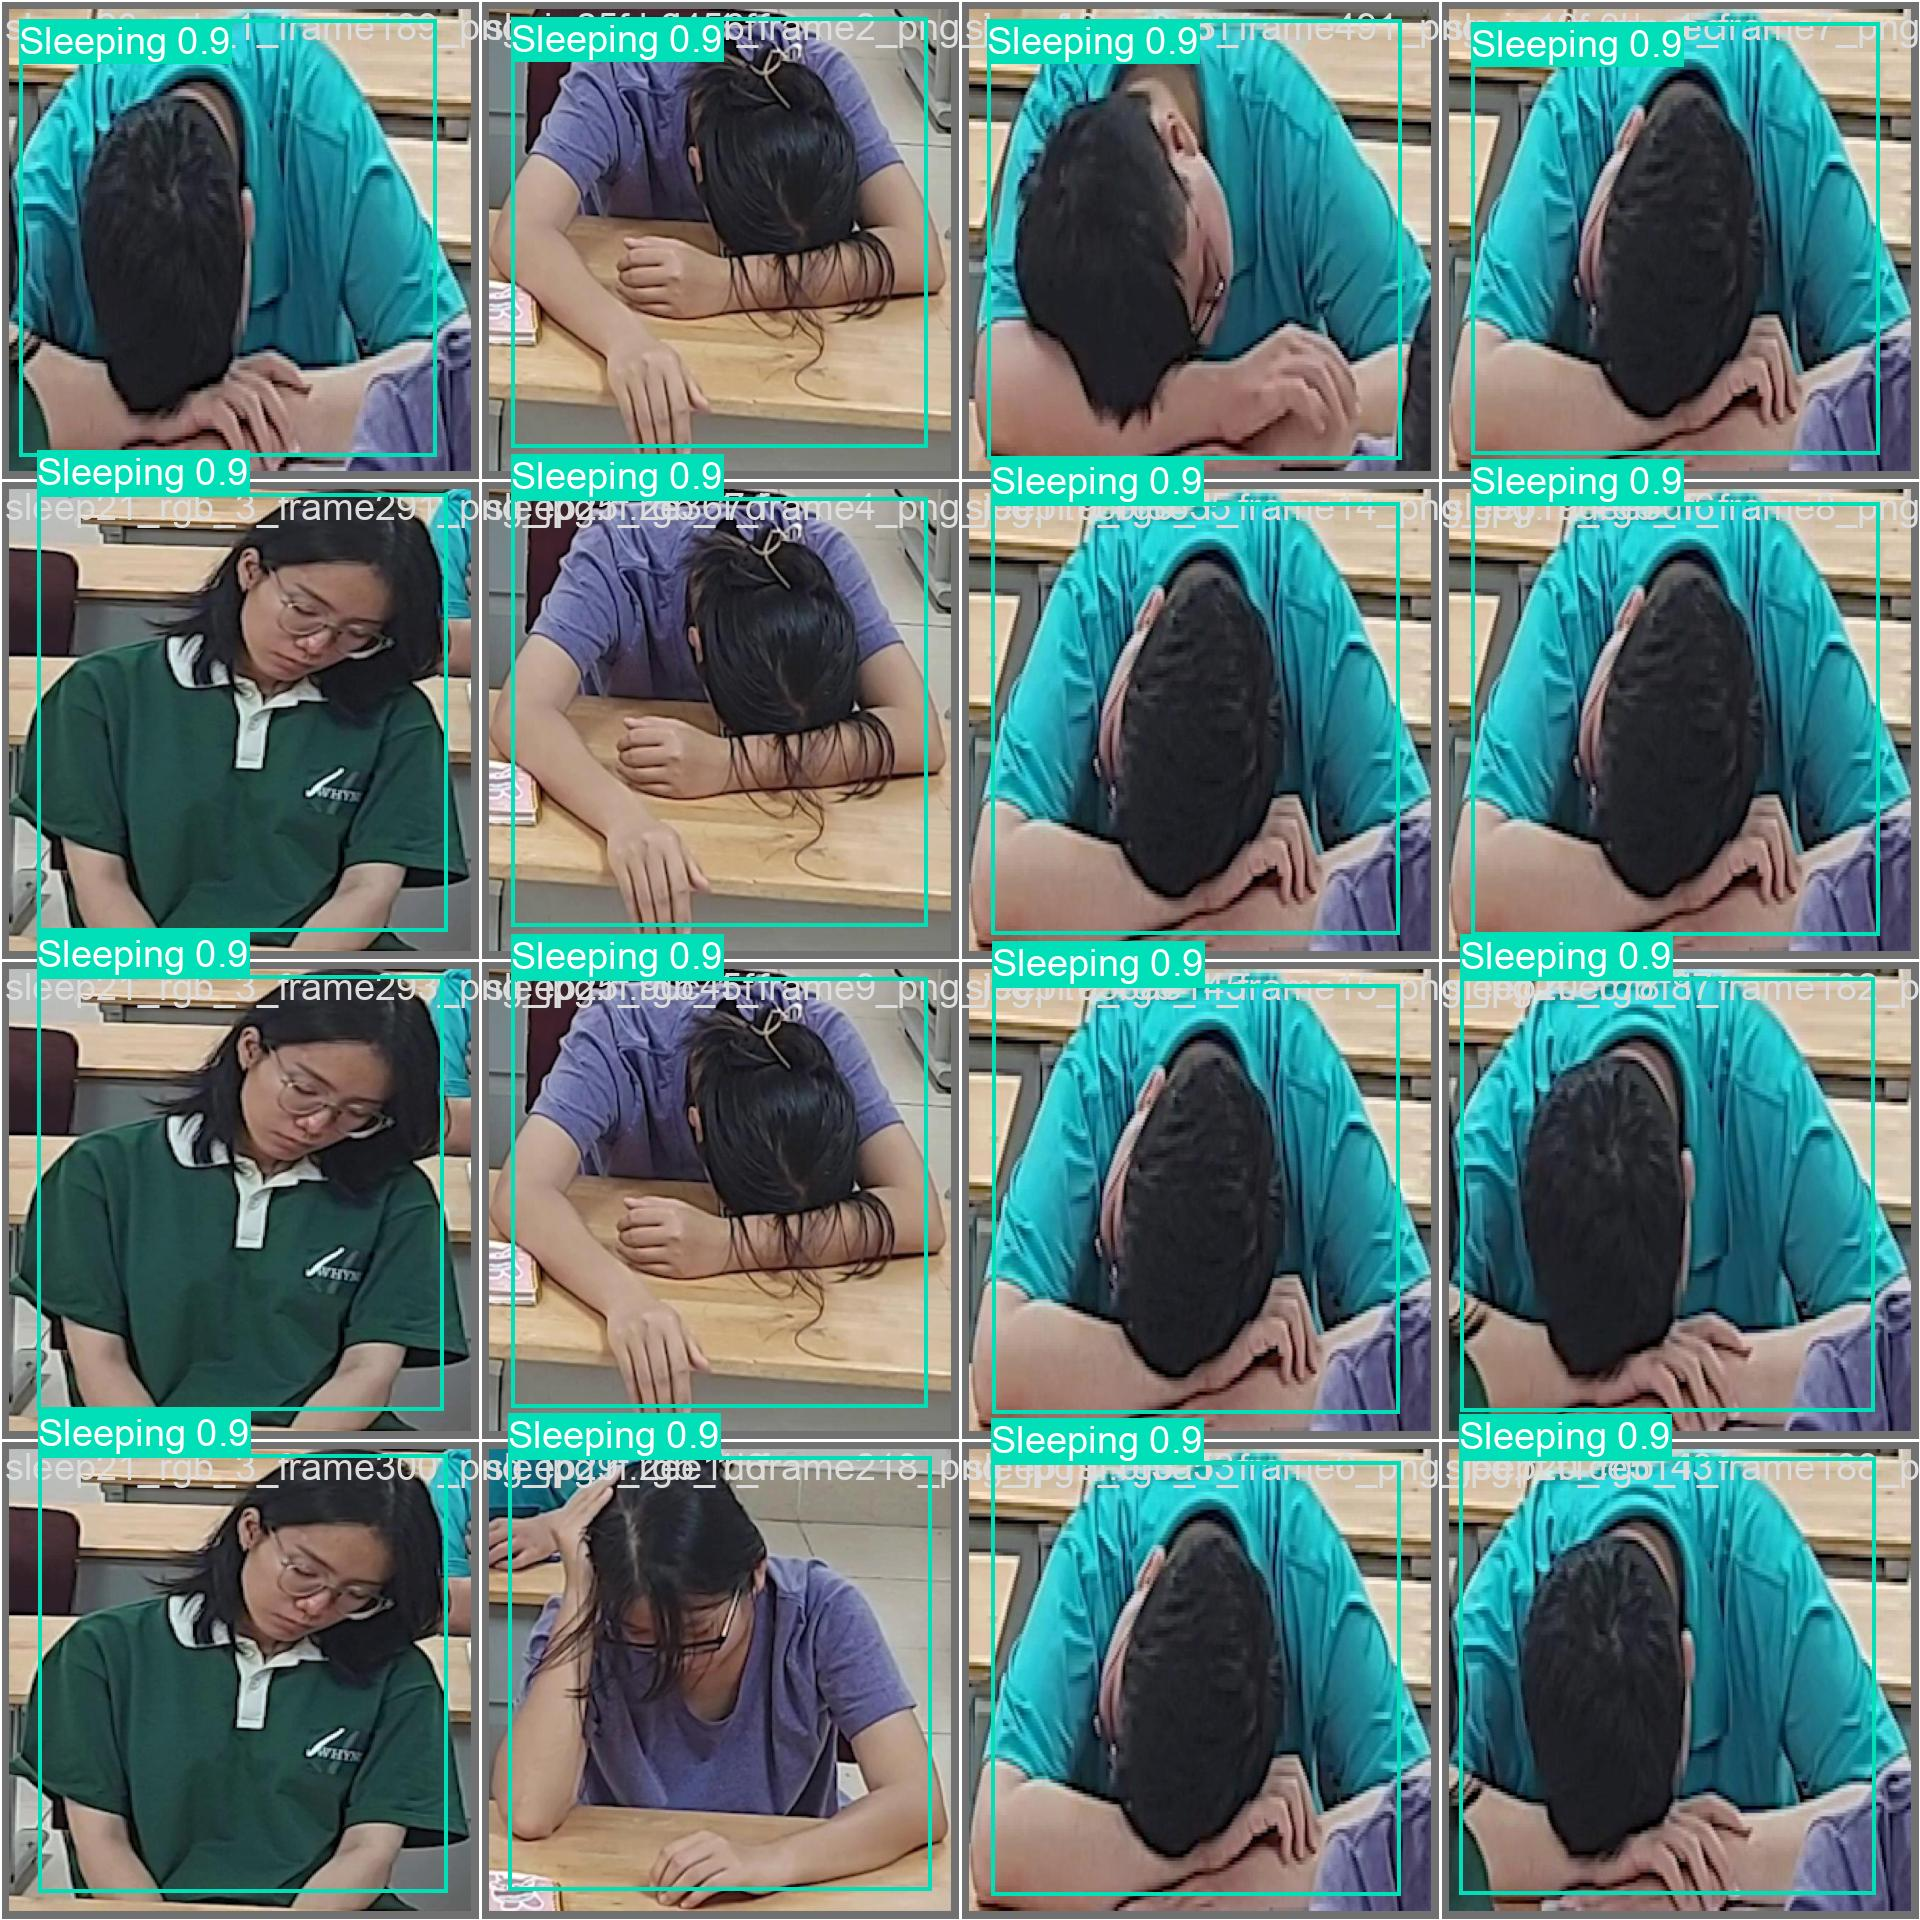

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

/kaggle/working


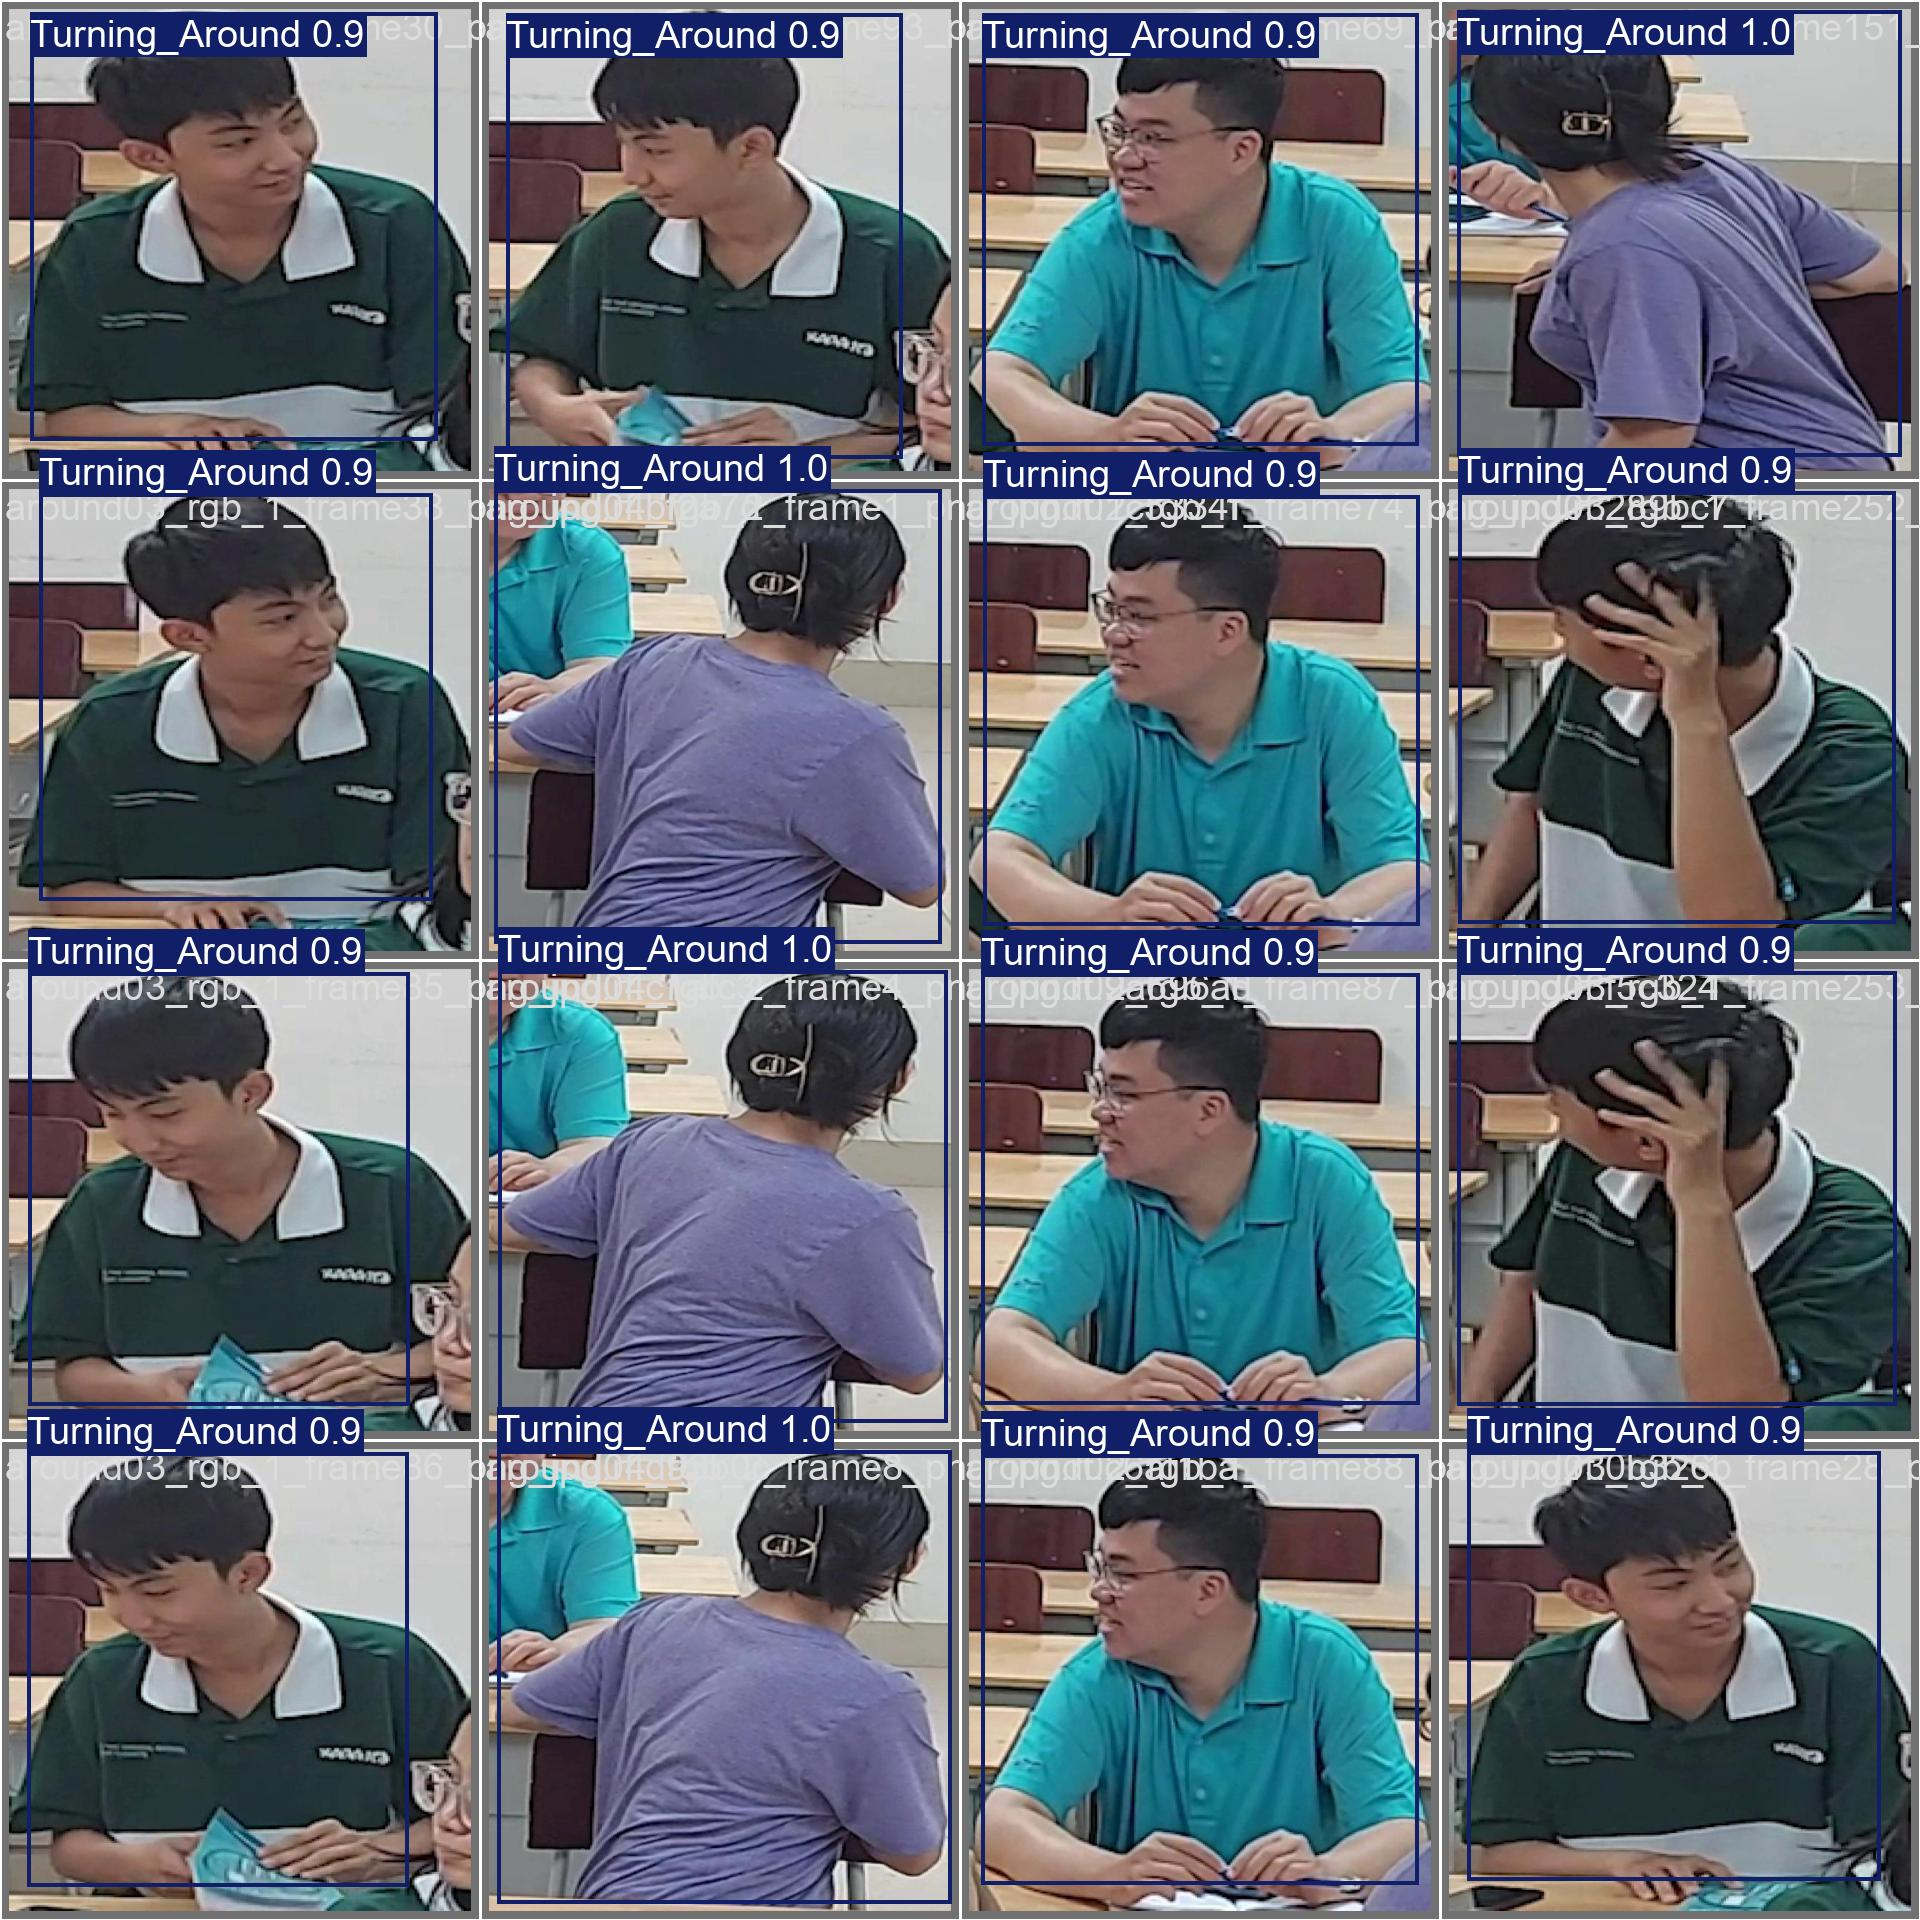

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

/kaggle/working


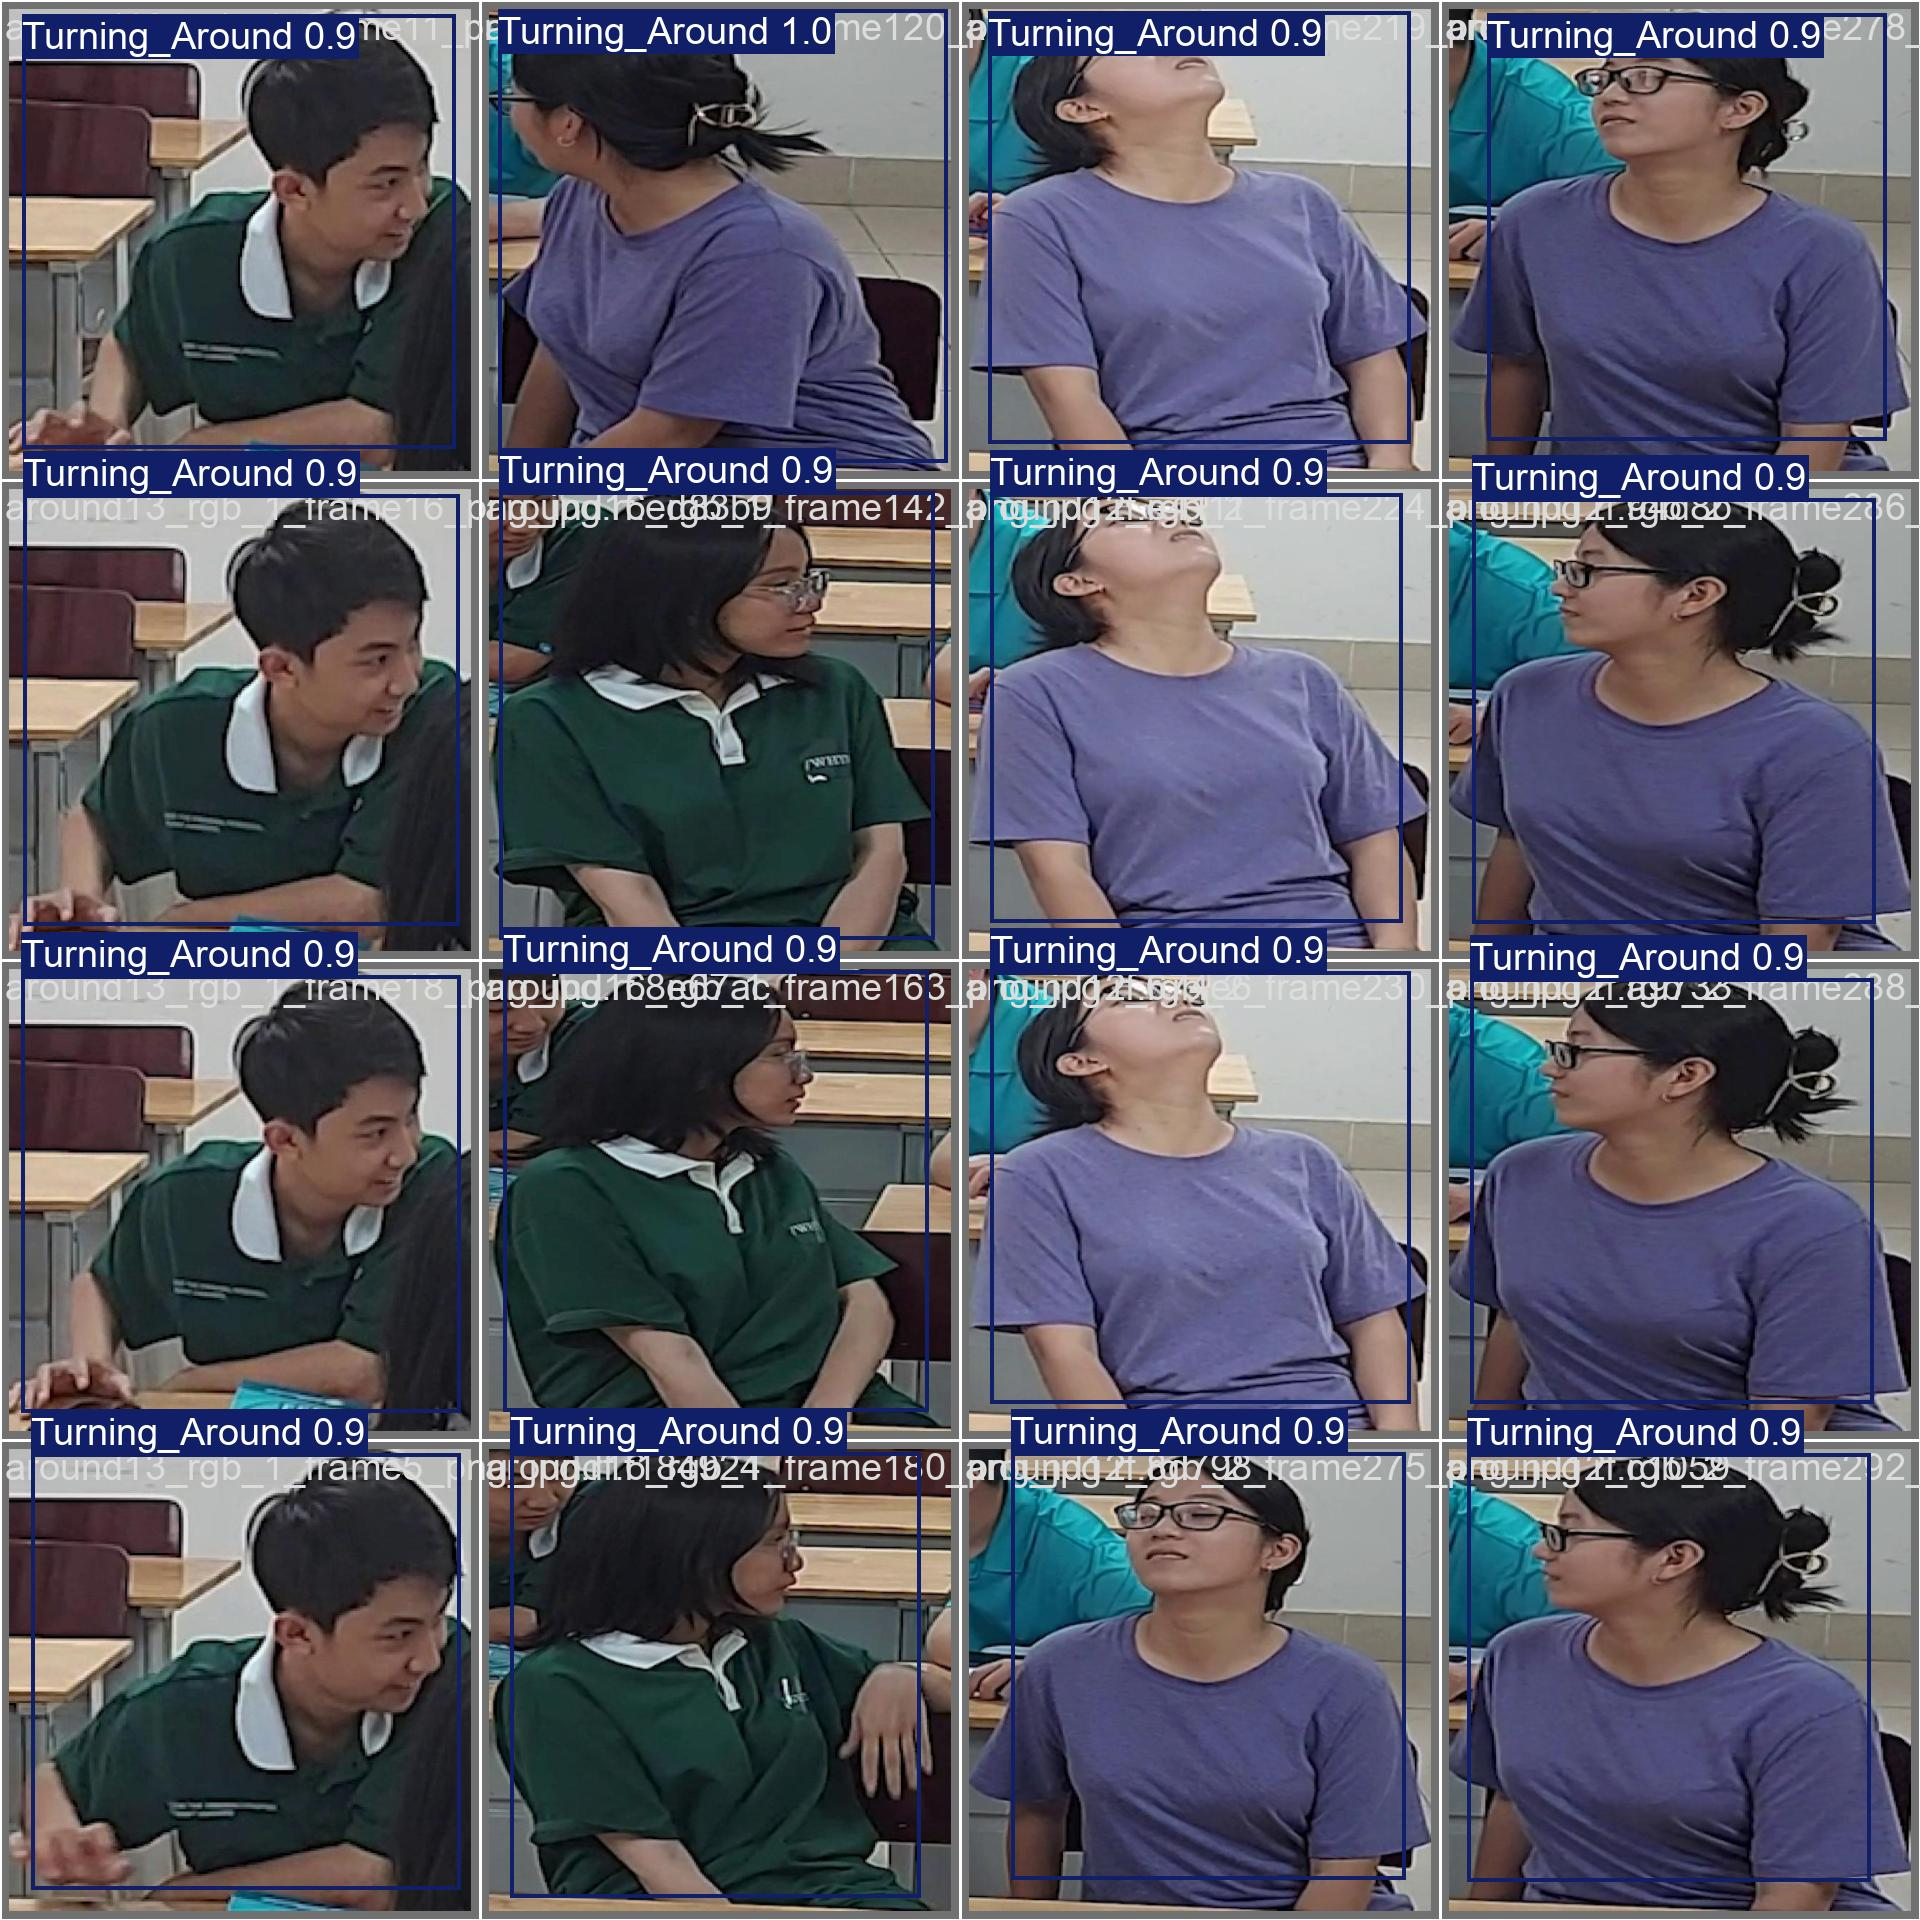

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs

image 1/226 /kaggle/working/Student-action-recognition-1/test/images/around02_rgb_1_frame109_png_jpg.rf.744506658fad67e7ed965712d4942ea7.jpg: 800x800 1 Turning_Around, 10.0ms
image 2/226 /kaggle/working/Student-action-recognition-1/test/images/around02_rgb_1_frame125_png_jpg.rf.e45a4174e7e47cdc774ebb97ec8e93a3.jpg: 800x800 1 Turning_Around, 10.1ms
image 3/226 /kaggle/working/Student-action-recognition-1/test/images/around02_rgb_1_frame133_png_jpg.rf.f7380b187b517c9bfd9dd6f1db6ccf4c.jpg: 800x800 1 Turning_Around, 10.0ms
image 4/226 /kaggle/working/Student-action-recognition-1/test/images/around02_rgb_1_frame135_png_jpg.rf.2d306594679d7521e415a3300fe600d4.jpg: 800x800 1 Turning_Around, 10.0ms
image 5/226 /kaggle/working/Student-action-recognition-1/test/images/around02_rgb_1_frame17_png_jpg.rf.5c2454aecac

In [ ]:
import pandas as pd
data=pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
print(data)

                      epoch           train/box_loss           train/cls_loss  \
0                         1                  0.66168                  2.18370   
1                         2                  0.54570                  1.30750   
2                         3                  0.54006                  1.08230   
3                         4                  0.51585                  0.94150   
4                         5                  0.50302                  0.84800   
5                         6                  0.49223                  0.78828   
6                         7                  0.48329                  0.72894   
7                         8                  0.47398                  0.67517   
8                         9                  0.46044                  0.62706   
9                        10                  0.46232                  0.61415   
10                       11                  0.45419                  0.57871   
11                       12 

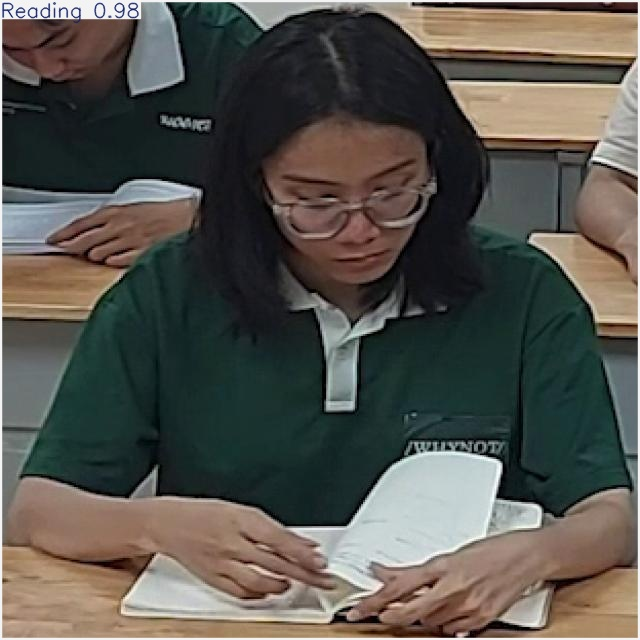

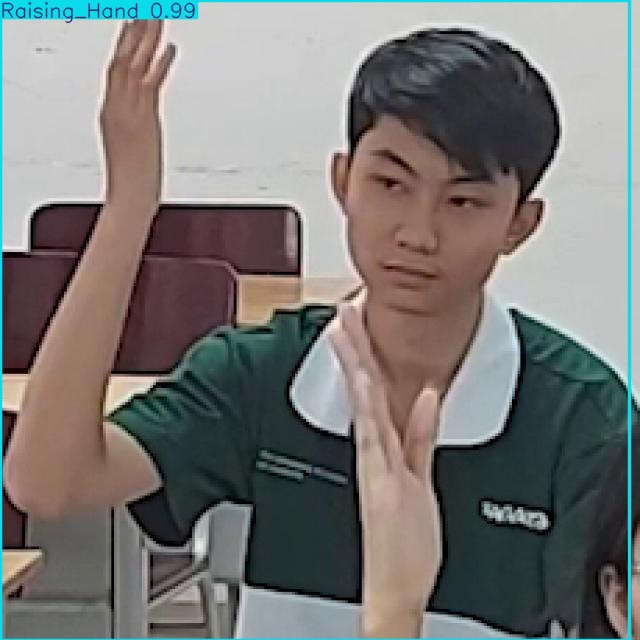

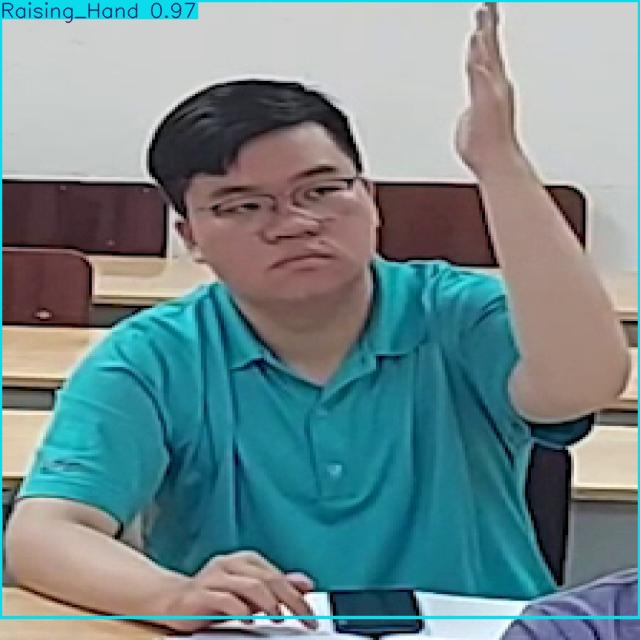

In [ ]:
import glob
from IPython.display import Image, display

model = YOLO("best.pt")
results = model(image_folder, save=True, show=True)

base_path = '/kaggle/working/runs/detect/'


subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]


latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]


for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

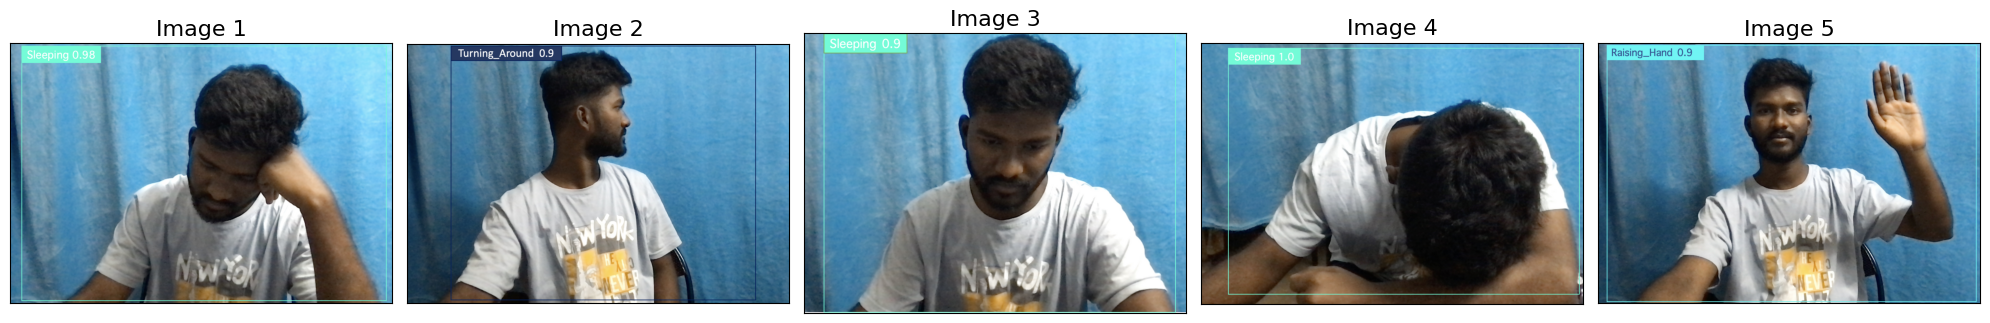

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

folder_path = "/kaggle/working/runs/detect/predict/yoloimages"

image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".png", ".jpeg"))]


plt.figure(figsize=(20, 10))

for i, img_file in enumerate(image_files[:5]):
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)


    ax = plt.subplot(1, 5, i + 1)
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Image {i+1}", fontsize=16)

plt.tight_layout()
plt.show()


In [ ]:
import os
import torch
import timm
from ultralytics import YOLO
from roboflow import Roboflow
from torchvision import transforms
import torch.nn as nn
import glob
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = YOLO('yolov8n.pt').to(device)

In [ ]:
vit_model = timm.create_model('swin_tiny_patch4_window7_224', pretrained=True, num_classes=0).to(device)

In [ ]:
for param in vit_model.parameters():
    param.requires_grad = False

In [ ]:
class AGLA(nn.Module):
    def __init__(self, in_channels):
        super(AGLA, self).__init__()
        self.global_att = nn.AdaptiveAvgPool2d(1)
        self.local_att = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1, groups=in_channels)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        global_feat = self.global_att(x)
        local_feat = self.local_att(x)
        attention = self.sigmoid(global_feat + local_feat)
        return x * attention

In [ ]:
class VAYOLO(nn.Module):
    def __init__(self, base_model, transformer, in_channels=768):
        super(VAYOLO, self).__init__()
        self.backbone = base_model.model.model[:6]
        self.neck = base_model.model.model[6:-2]
        self.head = base_model.model.model[-2:]
        self.transformer = transformer
        self.agla = AGLA(in_channels)
        self.conv1x1 = nn.Conv2d(in_channels, 256, kernel_size=1)

    def forward(self, x):

        x = self.backbone(x)


        transformer_feat = self.transformer(x.flatten(2).transpose(1, 2))
        transformer_feat = transformer_feat.transpose(1, 2).reshape(x.shape)


        fused_feat = self.agla(transformer_feat)
        fused_feat = self.conv1x1(fused_feat)


        x = self.neck(fused_feat)
        x = self.head(x)
        return x

In [ ]:

vayolo_model = VAYOLO(model, vit_model).to(device)

In [ ]:
yaml_content = f"""
nc: 5
depth_multiple: 0.67
width_multiple: 0.75

backbone:
  [[-1, 1, Focus, [64, 3]],
   [-1, 1, Conv, [128, 3, 2]],
   [-1, 3, C2f, [128]],
   [-1, 1, Conv, [256, 3, 2]],
   [-1, 6, C2f, [256]],
   [-1, 1, Conv, [512, 3, 2]],
   [-1, 9, C2f, [512]],
   [-1, 1, Conv, [1024, 3, 2]],
   [-1, 3, C2f, [1024]],
   # Use ViT instead of DETM
   [-1, 1, Conv, [1024, 3, 2]],
   [-1, 1, ViT, [1024]]
  ]

head:
  [[-1, 1, SPPF, [1024, 5]],
   [-1, 3, C2f, [1024]],
   [-1, 1, AGLA, [1024]],
   [[17, 20, 23], 1, Detect, [nc]]
  ]
"""

yaml_path = "/kaggle/working/vayolo.yaml"
with open(yaml_path, "w") as file:
    file.write(yaml_content)
print("✅ VAYOLO.yaml created successfully!")

In [ ]:
os.system(f"yolo task=detect mode=train model={yaml_path} data={dataset_path}/data.yaml epochs=50 imgsz=800 plots=True")

In [ ]:
os.system(f"yolo task=detect mode=train model=/kaggle/working/vayolo.yaml data=/kaggle/working//kaggle/working/Student-action-recognition-1/data.yaml epochs=50 imgsz=800 plots=True")


In [ ]:
print(f"YAML Path: {yaml_path}")
print(f"Dataset Path: {dataset_path}/data.yaml")

In [ ]:
import os
if not os.path.exists(yaml_path):
    print("❌ ERROR: YAML file not found!")
if not os.path.exists(f"{dataset_path}/data.yaml"):
    print("❌ ERROR: Dataset YAML file not found!")

In [ ]:
from ultralytics import YOLO

# Train the model using Python API
model = YOLO(yaml_path)
model.train(data=f"{dataset_path}/data.yaml", epochs=50, imgsz=800, plots=True)
